In [22]:
import matplotlib.pyplot as plt

Функция рассчета стоимости шагов

In [23]:
def pri(n, d):
    if n <= 0:
        return 0
    p = [0] * (n + 1)
    for i in range(1, n + 1):
        p[i] = p[i - 1] + d
    return p

Функция нахождения оптимальных шагов их стоимости

In [24]:
def opt(n, d, f, m):
    if n <= 0:
        return 0, []
    p = [0] * (n + 1)
    for i in range(1, n + 1):
        p[i] = p[i - 1] + d
    c = [float('inf')] * (n + 1)
    c[0] = 0  
    ps = [0] * (n + 1)

    for i in range(1, n + 1):
        for j in range(len(f)):
            if i - f[j] >= 0:
                cc = c[i - f[j]] + d
                if cc < c[i]:
                    c[i] = cc
                    ps[i] = i - f[j]

        for j in range(len(m)):
            if i % m[j] == 0:
                cc = c[i // m[j]] + d
                if cc < c[i]:
                    c[i] = cc
                    ps[i] = i // m[j]

    op = []
    cs = n
    while cs > 0:
        op.append(cs)
        cs = ps[cs]

    op.reverse()
    
    return op, c[n]

Задание входных значений и вывод результата

Входные значения для примера:
- Количество ступенек (n) - 100
- Шаг повышения цены (d) - 1
- Шаги движения вперед (т.е. +1 и тд) - 2, 4
- Множители индекса ступеньки (т.е. *2 и тд) - 3


In [25]:
n = int(input("Введите число ступенек: "))
d = int(input("Введите шаг повышения цены: "))

fs = []
print("Введите шаг для движения вперед (введите 0 для завершения ввода):")
while True:
    s = int(input())
    if s == 0:
        break
    fs.append(s)

ms = []
print("Введите множители для индекса ступеньки (введите 0 для завершения ввода):")
while True:
    m = int(input())
    if m == 0:
        break
    ms.append(m)
p = pri(n,d)
op, s = opt(n, d, fs, ms)
fp=[0]*len(op)

for i in range (len(op)):
    fp[i] = p[op[i]]+fp[i-1]
print("Минимальная сумма: ", fp[len(fp)-1])
print("Оптимальный путь:", op)
print("Изменение цены от выбора ступеньки:", fp)
print("Кол-во шагов:", s)

x = op
y = fp


Введите шаг для движения вперед (введите 0 для завершения ввода):
Введите множители для индекса ступеньки (введите 0 для завершения ввода):
Минимальная сумма:  280
Оптимальный путь: [4, 8, 10, 30, 32, 96, 100]
Изменение цены от выбора ступеньки: [4, 12, 22, 52, 84, 180, 280]
Кол-во шагов: 7


Отображение графика оптимального решения

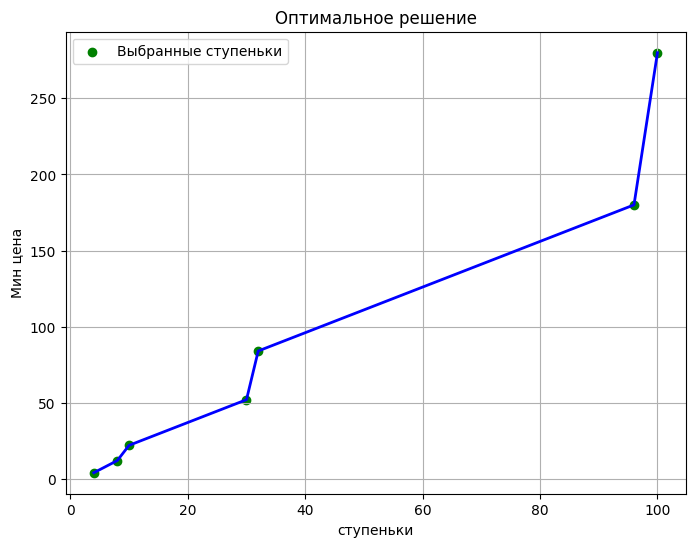

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linestyle='-', linewidth=2)  
plt.scatter(x, y, color='green', marker='o', label='Выбранные ступеньки')
plt.xlabel('ступеньки') 
plt.ylabel('Мин цена') 
plt.title('Оптимальное решение') 
plt.legend()
plt.grid(True)
plt.show()  